In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import pandas as pd 
import random
import math
import time
import seaborn as sns

### Problem Statement:
The COVID-19 pandemic has changed the world as we know it for people across all strata. For Data
Scientists, especially those working with Healthcare and pharmaceutical organizations the implications
are far reaching and in most situations the business needs are changing rapidly.


### Aim:
This assignment looks to answer some of the key questions highlighted below, while also coming up
with other intriguing insights and recommendations using data:
1. How does the exposure level govern the pandemic?
2. What is the nature of impact that comorbidity has on the pandemic and fatality rate?
3. Do missing values in data have any significance? (Is there any field intentionally left blank if so
what is the reason?)
4. What is the typical onset to disease maturity rate?
5. Can we definitively say that we have race influencing the pandemic?
6. What are other insights, key actions and strategies that can be recommended to CDC through
analysis of data?

#### DO ICU PREDICTION

In [2]:
df = pd.read_csv('COVID-19_Case_Surveillance_Public_Use_Data.csv')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df.head()

,cdc_case_earliest_dt,cdc_report_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,race_ethnicity_combined,hosp_yn,icu_yn,death_yn,medcond_yn
0,2020/03/23,2020/03/31,2020/03/23,NaN,Laboratory-confirmed case,Female,0 - 9 Years,"Black, Non-Hispanic",Unknown,Unknown,Unknown,Unknown
1,2020/03/22,2020/03/23,2020/03/23,NaN,Laboratory-confirmed case,Female,0 - 9 Years,Hispanic/Latino,Yes,Unknown,Unknown,Unknown
2,2020/03/22,2020/03/22,2020/03/23,2020/03/22,Laboratory-confirmed case,Female,0 - 9 Years,Hispanic/Latino,No,No,No,No
3,2020/03/23,2020/03/23,2020/03/23,2020/03/23,Laboratory-confirmed case,Female,0 - 9 Years,Hispanic/Latino,No,Missing,No,No
4,2020/03/23,2020/03/23,2020/03/23,NaN,Laboratory-confirmed case,Female,0 - 9 Years,Hispanic/Latino,Unknown,Unknown,Unknown,Unknown


<strong>cdc_case_earliest_dt:</strong>
The earlier of the Clinical Date (date related to the illness or specimen collection) or the Date Received by CDC

<strong>cdc_report_dt</strong>	
Initial case report date to CDC. Deprecated, use new cdc_case_earliest_dt

<strong>pos_spec_dt	</strong>
Date of first positive specimen collection

<strong>onset_dt</strong>
Symptom onset date, if symptomatic

<strong>current_status</strong>	
Case Status: Laboratory-confirmed case; Probable case

<strong>sex	</strong>	
Sex: Male; Female; Unknown; Other

<strong>age_group</strong>		
Age Group: 0 - 9 Years; 10 - 19 Years; 20 - 39 Years; 40 - 49 Years; 50 - 59 Years; 60 - 69 Years; 70 - 79 Years; 80 + Years

<strong>race_ethnicity_combined	</strong>
Race and ethnicity (combined): Hispanic/Latino; American Indian / Alaska Native, Non-Hispanic; Asian, Non-Hispanic; Black, Non-Hispanic; Native Hawaiian / Other Pacific Islander, Non-Hispanic; White, Non-Hispanic; Multiple/Other, Non-Hispanic

<strong>medcond_yn: </strong>	
Presence of underlying comorbidity or disease

In [4]:
df.shape

(13415836, 12)

In [5]:
df['cdc_report_dt'] = pd.to_datetime(df['cdc_report_dt'])

df['pos_spec_dt'] = pd.to_datetime(df['pos_spec_dt'])

df['onset_dt'] = pd.to_datetime(df['onset_dt'])

In [6]:
df['race_ethnicity_combined'].value_counts()

Unknown                                                 5175054
White, Non-Hispanic                                     4200325
Hispanic/Latino                                         1580091
Black, Non-Hispanic                                      983879
Missing                                                  625992
Multiple/Other, Non-Hispanic                             478992
Asian, Non-Hispanic                                      246432
American Indian/Alaska Native, Non-Hispanic               98864
Native Hawaiian/Other Pacific Islander, Non-Hispanic      26195
Name: race_ethnicity_combined, dtype: int64

In [7]:
df.head()

,cdc_case_earliest_dt,cdc_report_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,race_ethnicity_combined,hosp_yn,icu_yn,death_yn,medcond_yn
0,2020/03/23,2020-03-31,2020-03-23,NaT,Laboratory-confirmed case,Female,0 - 9 Years,"Black, Non-Hispanic",Unknown,Unknown,Unknown,Unknown
1,2020/03/22,2020-03-23,2020-03-23,NaT,Laboratory-confirmed case,Female,0 - 9 Years,Hispanic/Latino,Yes,Unknown,Unknown,Unknown
2,2020/03/22,2020-03-22,2020-03-23,2020-03-22,Laboratory-confirmed case,Female,0 - 9 Years,Hispanic/Latino,No,No,No,No
3,2020/03/23,2020-03-23,2020-03-23,2020-03-23,Laboratory-confirmed case,Female,0 - 9 Years,Hispanic/Latino,No,Missing,No,No
4,2020/03/23,2020-03-23,2020-03-23,NaT,Laboratory-confirmed case,Female,0 - 9 Years,Hispanic/Latino,Unknown,Unknown,Unknown,Unknown


In [8]:
df['disease maturity'] = df['onset_dt'] - df['pos_spec_dt']

In [9]:
df.head()

,cdc_case_earliest_dt,cdc_report_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,race_ethnicity_combined,hosp_yn,icu_yn,death_yn,medcond_yn,disease maturity
0,2020/03/23,2020-03-31,2020-03-23,NaT,Laboratory-confirmed case,Female,0 - 9 Years,"Black, Non-Hispanic",Unknown,Unknown,Unknown,Unknown,NaT
1,2020/03/22,2020-03-23,2020-03-23,NaT,Laboratory-confirmed case,Female,0 - 9 Years,Hispanic/Latino,Yes,Unknown,Unknown,Unknown,NaT
2,2020/03/22,2020-03-22,2020-03-23,2020-03-22,Laboratory-confirmed case,Female,0 - 9 Years,Hispanic/Latino,No,No,No,No,-1 days
3,2020/03/23,2020-03-23,2020-03-23,2020-03-23,Laboratory-confirmed case,Female,0 - 9 Years,Hispanic/Latino,No,Missing,No,No,0 days
4,2020/03/23,2020-03-23,2020-03-23,NaT,Laboratory-confirmed case,Female,0 - 9 Years,Hispanic/Latino,Unknown,Unknown,Unknown,Unknown,NaT


In [10]:
df['disease maturity'].describe()

count                     1912353
mean     -3 days +06:18:03.494103
std       12 days 05:59:19.396853
min           -341 days +00:00:00
25%             -4 days +00:00:00
50%             -2 days +00:00:00
75%               0 days 00:00:00
max             334 days 00:00:00
Name: disease maturity, dtype: object

* We can see that the mean is -3 days , which means symptoms set in after being tested positive. Sign of increasing awareness and people getting tested in advance. Also, Asymptomatics cases are to be factored in.

* Kindly note the std dev of 12 days

* Now if we were to factor in the earlier covid months, (Jan-May), this number should go up.

In [11]:
df_1 = df[df['pos_spec_dt'] < '05/01/2020']

In [12]:
df_1.shape

(541069, 13)

In [13]:
df_1.head()

,cdc_case_earliest_dt,cdc_report_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,race_ethnicity_combined,hosp_yn,icu_yn,death_yn,medcond_yn,disease maturity
0,2020/03/23,2020-03-31,2020-03-23,NaT,Laboratory-confirmed case,Female,0 - 9 Years,"Black, Non-Hispanic",Unknown,Unknown,Unknown,Unknown,NaT
1,2020/03/22,2020-03-23,2020-03-23,NaT,Laboratory-confirmed case,Female,0 - 9 Years,Hispanic/Latino,Yes,Unknown,Unknown,Unknown,NaT
2,2020/03/22,2020-03-22,2020-03-23,2020-03-22,Laboratory-confirmed case,Female,0 - 9 Years,Hispanic/Latino,No,No,No,No,-1 days
3,2020/03/23,2020-03-23,2020-03-23,2020-03-23,Laboratory-confirmed case,Female,0 - 9 Years,Hispanic/Latino,No,Missing,No,No,0 days
4,2020/03/23,2020-03-23,2020-03-23,NaT,Laboratory-confirmed case,Female,0 - 9 Years,Hispanic/Latino,Unknown,Unknown,Unknown,Unknown,NaT


In [14]:
df_1['disease maturity'].describe()

count                      179024
mean     -4 days +23:33:47.151666
std       18 days 10:09:44.412091
min           -112 days +00:00:00
25%             -7 days +00:00:00
50%             -3 days +00:00:00
75%             -1 days +00:00:00
max             334 days 00:00:00
Name: disease maturity, dtype: object

* As Expected the std is 18 days , that's how much the members of this group differ from the mean value of the group.

In [15]:
df.age_group.value_counts()

20 - 29 Years    2567606
30 - 39 Years    2198860
40 - 49 Years    2013231
50 - 59 Years    1945338
60 - 69 Years    1372151
10 - 19 Years    1367283
70 - 79 Years     762250
80+ Years         579595
0 - 9 Years       527700
Unknown            81756
Name: age_group, dtype: int64

In [16]:
df.age_group.describe()

count          13415770
unique               10
top       20 - 29 Years
freq            2567606
Name: age_group, dtype: object

In [17]:
age_map = {'0 - 9 Years': 10,'10 - 19 Years':20,'20 - 29 Years':30,'30 - 39 Years':40,'40 - 49 Years':50,'50 - 59 Years':60,'60 - 69 Years':70,'70 - 79 Years':80,'80+ Years':90}

In [18]:
df['age_group'] = df['age_group'].map(age_map)

In [19]:
df.age_group.describe()

count    1.333401e+07
mean     4.681120e+01
std      2.038879e+01
min      1.000000e+01
25%      3.000000e+01
50%      5.000000e+01
75%      6.000000e+01
max      9.000000e+01
Name: age_group, dtype: float64

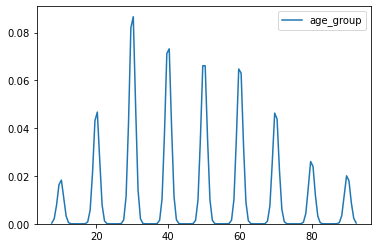

In [20]:
sns.kdeplot(df['age_group'])

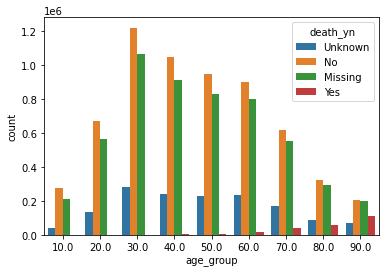

In [21]:
sns.countplot(x=df.age_group, hue=df.death_yn)

* More prevalant in age groups 20 - 60 , "working class" people who go to colleges/ work are more prone to catching covid than children and senior citizens who mostly stay at homes.

* More number of deaths also seen in older age groups

### Let's try to do some time series analysis with onset dates and Race

In [23]:
df_timeser_cdc = df.groupby(by=['cdc_report_dt','current_status'], as_index=False)['sex'].count()

df_timeser_cdc.head()

,cdc_report_dt,current_status,sex
0,2020-01-01,Laboratory-confirmed case,11
1,2020-01-01,Probable Case,4
2,2020-01-02,Laboratory-confirmed case,3
3,2020-01-03,Laboratory-confirmed case,1
4,2020-01-03,Probable Case,2


In [24]:
df_timeser_cdc = df.groupby(by=['cdc_report_dt','current_status'], as_index=False)['sex'].count().melt(id_vars=['current_status','sex']).rename(columns={'variable':'report_type','value':'date'})

df_timeser_pos = df.groupby(by=['pos_spec_dt','current_status'], as_index=False)['sex'].count().melt(id_vars=['current_status','sex']).rename(columns={'variable':'report_type','value':'date'})

df_timeser_onset = df.groupby(by=['onset_dt','current_status'], as_index=False)['sex'].count().melt(id_vars=['current_status','sex']).rename(columns={'variable':'report_type','value':'date'})

In [25]:
new_df = df_timeser_cdc.append(df_timeser_pos).append(df_timeser_onset)

new_df = new_df.sort_values(by=['date'],ascending=True)

new_df_1 = new_df[new_df['current_status'] == 'Laboratory-confirmed case']

new_df_2 = new_df[new_df['current_status'] == 'Probable Case']

reports = new_df['report_type'].unique()

In [26]:
new_df.head()

,current_status,sex,report_type,date
0,Laboratory-confirmed case,11,cdc_report_dt,2020-01-01
0,Laboratory-confirmed case,3,pos_spec_dt,2020-01-01
1,Probable Case,18,onset_dt,2020-01-01
0,Laboratory-confirmed case,68,onset_dt,2020-01-01
1,Probable Case,4,cdc_report_dt,2020-01-01


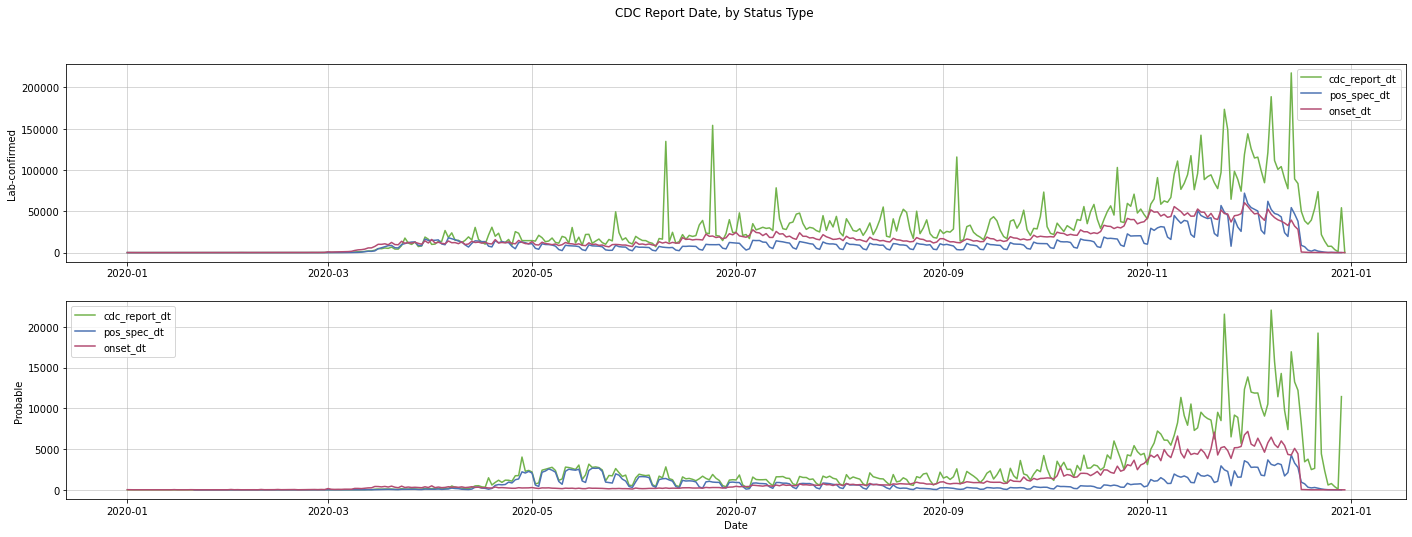

In [27]:
fig, (ax1, ax2) = plt.subplots(2, 1,figsize=(24,8))
fig.suptitle('CDC Report Date, by Status Type')
colors = ['#72B34C','#4C72B3','#B34C72']
i=0

for report in reports:
    ax1.plot(new_df_1[new_df_1['report_type'] == report]['date'],
             new_df_1[new_df_1['report_type'] == report]['sex'],
             label=report,
             color=colors[i])
    i+=1
j=0

for report in reports:
    ax2.plot(new_df_2[new_df_2['report_type'] == report]['date'],
             new_df_2[new_df_2['report_type'] == report]['sex'],
             label=report,
             color=colors[j])
    j+=1
    
ax2.set_xlabel('Date')
ax2.set_ylabel('Probable')
ax1.set_ylabel('Lab-confirmed')
ax1.grid(linewidth=0.5)
ax1.legend()
ax2.grid(linewidth=0.5)
ax2.legend()
plt.show()

* In the below graph we can see a rise in symptoms without a rise in positive results. It implies people are more cautions during the winters which brings cold and flu with it.

In [22]:
df.head()

,cdc_case_earliest_dt,cdc_report_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,race_ethnicity_combined,hosp_yn,icu_yn,death_yn,medcond_yn,disease maturity
0,2020/03/23,2020-03-31,2020-03-23,NaT,Laboratory-confirmed case,Female,10.0,"Black, Non-Hispanic",Unknown,Unknown,Unknown,Unknown,NaT
1,2020/03/22,2020-03-23,2020-03-23,NaT,Laboratory-confirmed case,Female,10.0,Hispanic/Latino,Yes,Unknown,Unknown,Unknown,NaT
2,2020/03/22,2020-03-22,2020-03-23,2020-03-22,Laboratory-confirmed case,Female,10.0,Hispanic/Latino,No,No,No,No,-1 days
3,2020/03/23,2020-03-23,2020-03-23,2020-03-23,Laboratory-confirmed case,Female,10.0,Hispanic/Latino,No,Missing,No,No,0 days
4,2020/03/23,2020-03-23,2020-03-23,NaT,Laboratory-confirmed case,Female,10.0,Hispanic/Latino,Unknown,Unknown,Unknown,Unknown,NaT


In [23]:
df['Race'] = df['race_ethnicity_combined'].str.split(',').str[0]
df = df.drop('race_ethnicity_combined', axis=1)

In [24]:
df.Race.value_counts()

Unknown                                   5175054
White                                     4200325
Hispanic/Latino                           1580091
Black                                      983879
Missing                                    625992
Multiple/Other                             478992
Asian                                      246432
American Indian/Alaska Native               98864
Native Hawaiian/Other Pacific Islander      26195
Name: Race, dtype: int64

In [31]:
df_race = df.groupby(by=['cdc_report_dt','current_status', 'Race'])['sex'].count().reset_index()

In [32]:
df_race1 = df_race[df_race['current_status']=='Laboratory-confirmed case']
df_race2 = df_race[df_race['current_status']=='Probable Case']

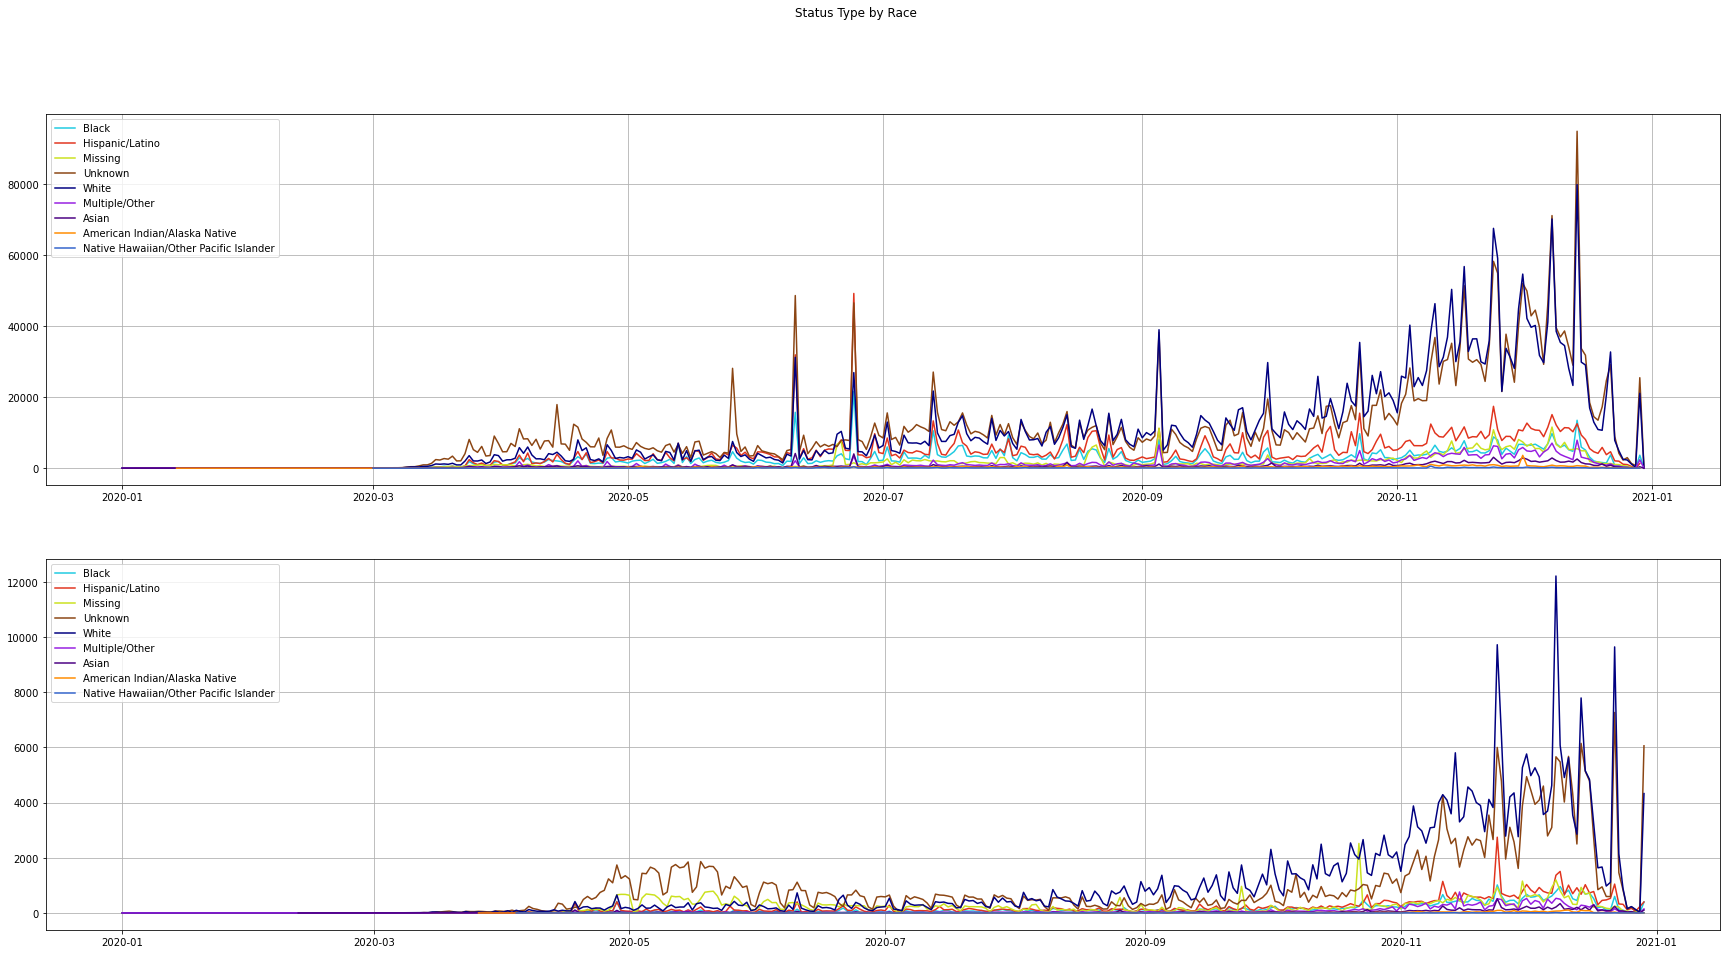

In [33]:
fig, (ax1, ax2) = plt.subplots(2, 1,figsize=(30,15))
fig.suptitle('Status Type by Race')
races = df['Race'].unique()[:-1]
colors = ['#1ecbe1','#E1341E','#CBE11E','saddlebrown','navy','#961EE1','indigo','darkorange','#3364CC','white']
i=0
for race in races:
    ax1.plot(df_race1[df_race1['Race'] == race]['cdc_report_dt'],
             df_race1[df_race1['Race'] == race]['sex'],
             label=race,
             color=colors[i])
    i+=1
    
j=0
for race in races:
    ax2.plot(df_race2[df_race2['Race'] == race]['cdc_report_dt'],
             df_race2[df_race2['Race'] == race]['sex'],
             label=race,
             color=colors[j])
    j+=1


ax1.grid()
ax1.legend()
ax2.grid()
ax2.legend()
plt.show()

* Now Checking the null values

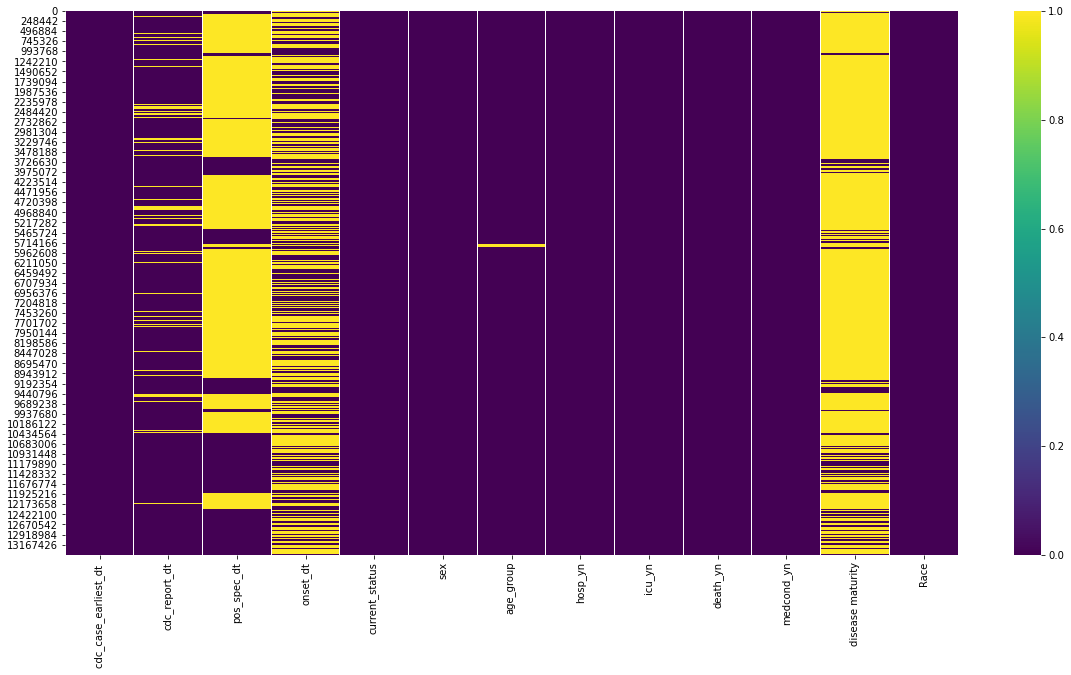

In [34]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(),cmap='viridis')

* pos_spec_dt and onset_dt has too many null values, it's better to drop the entire column

In [25]:
df.drop(['pos_spec_dt','onset_dt'], axis = 1, inplace=True)

In [26]:
df.shape

(13415836, 11)

In [27]:
df = df.dropna() # dropping other null values

In [28]:
df.shape

(1912019, 11)

In [29]:
df.isnull().sum()

cdc_case_earliest_dt     0
cdc_report_dt            0
current_status           0
sex                      0
age_group                0
hosp_yn                  0
icu_yn                   0
death_yn                 0
medcond_yn               0
disease maturity         0
Race                     0
dtype: int64

#### Now that we have removed the null values, we are ready for further Exploratory Data Analysis

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1912019 entries, 2 to 13415835
Data columns (total 11 columns):
 #   Column                 Dtype          
---  ------                 -----          
 0   cdc_case_earliest_dt   object         
 1   cdc_report_dt          datetime64[ns] 
 2   current_status         object         
 3   sex                    object         
 4   age_group              float64        
 5   hosp_yn                object         
 6   icu_yn                 object         
 7   death_yn               object         
 8   medcond_yn             object         
 9   disease maturity       timedelta64[ns]
 10  Race                   object         
dtypes: datetime64[ns](1), float64(1), object(8), timedelta64[ns](1)
memory usage: 175.1+ MB


In [31]:
df.describe()

,age_group,disease maturity
count,1.912019e+06,1912019
mean,4.597751e+01,-3 days +06:17:52.589759
std,1.993874e+01,12 days 05:59:40.412071
min,1.000000e+01,-341 days +00:00:00
25%,3.000000e+01,-4 days +00:00:00
50%,4.000000e+01,-2 days +00:00:00
75%,6.000000e+01,0 days 00:00:00
max,9.000000e+01,334 days 00:00:00


In [32]:
df.head()

,cdc_case_earliest_dt,cdc_report_dt,current_status,sex,age_group,hosp_yn,icu_yn,death_yn,medcond_yn,disease maturity,Race
2,2020/03/22,2020-03-22,Laboratory-confirmed case,Female,10.0,No,No,No,No,-1 days,Hispanic/Latino
3,2020/03/23,2020-03-23,Laboratory-confirmed case,Female,10.0,No,Missing,No,No,0 days,Hispanic/Latino
5,2020/03/23,2020-03-23,Laboratory-confirmed case,Female,10.0,No,Missing,No,No,0 days,Hispanic/Latino
8,2020/03/16,2020-03-31,Laboratory-confirmed case,Male,10.0,Yes,No,No,Yes,-7 days,Missing
16,2020/03/15,2020-03-15,Laboratory-confirmed case,Male,10.0,No,Missing,No,No,-8 days,Unknown


In [27]:
# Let's have a look at value counts of each column in the dataframe
for feature in list(df.columns):
    print(f'======================= {feature} =======================')
    print(df[feature].value_counts(dropna=False))
    print('')

======================= cdc_case_earliest_dt  =======================
2020/12/08    192773
2020/11/24    171660
2020/12/01    154587
2020/11/30    145440
2020/12/14    141055
               ...  
2020/01/18        14
2020/01/03        12
2020/01/16        11
2020/01/04        11
2020/01/09        10
Name: cdc_case_earliest_dt , Length: 351, dtype: int64

======================= cdc_report_dt =======================
2020-12-14    231978
2020-12-08    208991
2020-11-24    193754
2020-11-25    160655
2020-06-24    155858
               ...  
2020-01-12         2
2020-01-16         1
2020-01-09         1
2020-01-04         1
2020-01-05         1
Name: cdc_report_dt, Length: 363, dtype: int64

======================= current_status =======================
Laboratory-confirmed case    11277086
Probable Case                  849742
Name: current_status, dtype: int64

======================= sex =======================
Female     6285903
Male       5698643
Unknown     106740
Missing      35339

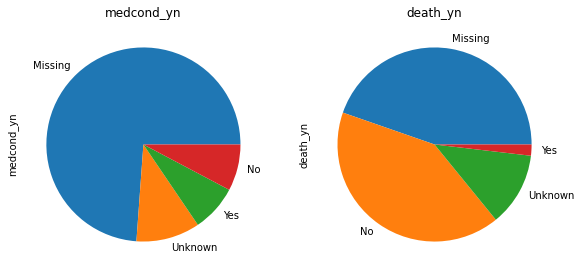

In [28]:
plt.figure(figsize=(20,10))
plt.subplot(141)
plt.title('medcond_yn')
df['medcond_yn'].value_counts().plot.pie()

plt.subplot(142)
plt.title('death_yn')
df['death_yn'].value_counts().plot.pie()


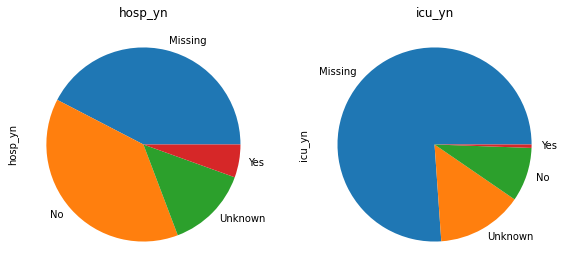

In [29]:
plt.figure(figsize=(20,10))
plt.subplot(141)
plt.title('hosp_yn')
df['hosp_yn'].value_counts().plot.pie()

plt.subplot(142)
plt.title('icu_yn')
df['icu_yn'].value_counts().plot.pie()

### Huge amount of data is labelled 'missing'  for our 4 categorical features

In [30]:
df.head()

,cdc_case_earliest_dt,cdc_report_dt,current_status,sex,age_group,race_ethnicity_combined,hosp_yn,icu_yn,death_yn,medcond_yn
0,2020/03/23,2020-03-31,Laboratory-confirmed case,Female,10.0,"Black, Non-Hispanic",Unknown,Unknown,Unknown,Unknown
1,2020/03/22,2020-03-23,Laboratory-confirmed case,Female,10.0,Hispanic/Latino,Yes,Unknown,Unknown,Unknown
2,2020/03/22,2020-03-22,Laboratory-confirmed case,Female,10.0,Hispanic/Latino,No,No,No,No
3,2020/03/23,2020-03-23,Laboratory-confirmed case,Female,10.0,Hispanic/Latino,No,Missing,No,No
4,2020/03/23,2020-03-23,Laboratory-confirmed case,Female,10.0,Hispanic/Latino,Unknown,Unknown,Unknown,Unknown


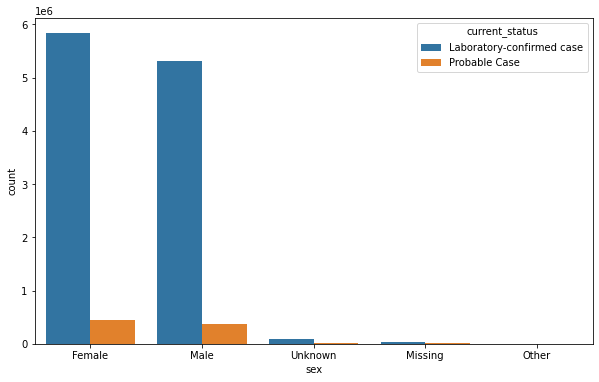

In [31]:
plt.figure(figsize=(10,6))
sns.countplot(df.sex, hue=df.current_status)

### Women are more likely to be lab-confirmed than men

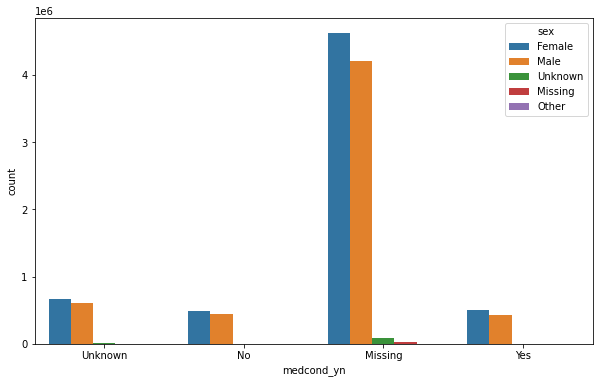

In [32]:
plt.figure(figsize=(10,6))
sns.countplot(df.medcond_yn, hue=df.sex)

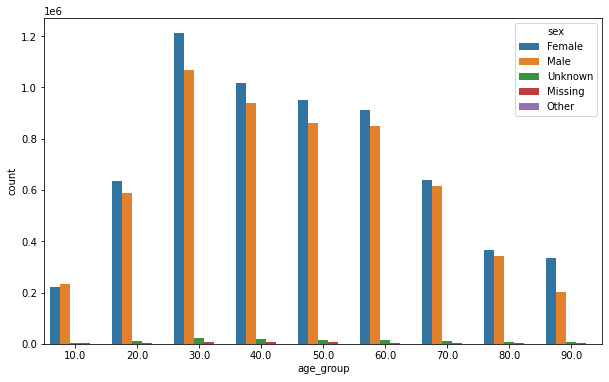

In [33]:
plt.figure(figsize=(10,6))
sns.countplot(df.age_group, hue=df.sex)

* More Females than males in almost all age groups

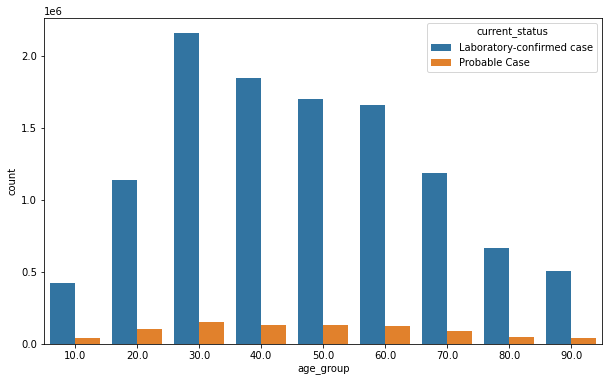

In [34]:
plt.figure(figsize=(10,6))
sns.countplot(df.age_group, hue=df.current_status)

In [35]:
df.head()

,cdc_case_earliest_dt,cdc_report_dt,current_status,sex,age_group,race_ethnicity_combined,hosp_yn,icu_yn,death_yn,medcond_yn
0,2020/03/23,2020-03-31,Laboratory-confirmed case,Female,10.0,"Black, Non-Hispanic",Unknown,Unknown,Unknown,Unknown
1,2020/03/22,2020-03-23,Laboratory-confirmed case,Female,10.0,Hispanic/Latino,Yes,Unknown,Unknown,Unknown
2,2020/03/22,2020-03-22,Laboratory-confirmed case,Female,10.0,Hispanic/Latino,No,No,No,No
3,2020/03/23,2020-03-23,Laboratory-confirmed case,Female,10.0,Hispanic/Latino,No,Missing,No,No
4,2020/03/23,2020-03-23,Laboratory-confirmed case,Female,10.0,Hispanic/Latino,Unknown,Unknown,Unknown,Unknown


In [36]:
df_2 = df[['medcond_yn','death_yn']]

In [37]:
df_2.medcond_yn.value_counts()

Missing    8955668
Unknown    1289612
Yes         943902
No          937646
Name: medcond_yn, dtype: int64

In [38]:
df_2.death_yn.value_counts()

Missing    5417454
No         4997448
Unknown    1487358
Yes         224568
Name: death_yn, dtype: int64

In [39]:
df_2.isnull().sum()

medcond_yn    0
death_yn      0
dtype: int64

In [40]:
df_2.head()

,medcond_yn,death_yn
0,Unknown,Unknown
1,Unknown,Unknown
2,No,No
3,No,No
4,Unknown,Unknown


In [55]:
mapping = {'Yes':1, 'No':0, 'Missing':2, 'Unknown':3}

In [56]:
df_2['medcond_yn'] = df_2['medcond_yn'].map(mapping)

<ipython-input-56-3d162616acda>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['medcond_yn'] = df_2['medcond_yn'].map(mapping)


In [57]:
df_2['death_yn'] = df_2['death_yn'].map(mapping)

<ipython-input-57-1bff2716224e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['death_yn'] = df_2['death_yn'].map(mapping)


In [58]:
df_2.head()

,medcond_yn,death_yn
2,0,0
3,0,0
5,0,0
8,1,0
16,0,0


In [59]:
df_2['medcond_yn'].corr(df_2['death_yn'])

0.36316818470311074

* This does not give a very good idea of how strongly these two features are correlated since both have a lot of missing and unknown values

* To get a better idea we will use another dataset

* it's a medical precondition dataset from the govt of mexico.

dataset source = https://www.gob.mx/salud/documentos/datos-abiertos-152127

In [60]:
covid = pd.read_csv('covid.csv')

In [61]:
covid.head()

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,...,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,16169f,2,1,04-05-2020,02-05-2020,9999-99-99,97,2,27,97,...,2,2,2,2,2,2,2,2,1,97
1,1009bf,2,1,19-03-2020,17-03-2020,9999-99-99,97,2,24,97,...,2,2,2,2,2,2,2,99,1,97
2,167386,1,2,06-04-2020,01-04-2020,9999-99-99,2,2,54,2,...,2,2,2,2,1,2,2,99,1,2
3,0b5948,2,2,17-04-2020,10-04-2020,9999-99-99,2,1,30,97,...,2,2,2,2,2,2,2,99,1,2
4,0d01b5,1,2,13-04-2020,13-04-2020,22-04-2020,2,2,60,2,...,2,1,2,1,2,2,2,99,1,2


In [62]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566602 entries, 0 to 566601
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   id                   566602 non-null  object
 1   sex                  566602 non-null  int64 
 2   patient_type         566602 non-null  int64 
 3   entry_date           566602 non-null  object
 4   date_symptoms        566602 non-null  object
 5   date_died            566602 non-null  object
 6   intubed              566602 non-null  int64 
 7   pneumonia            566602 non-null  int64 
 8   age                  566602 non-null  int64 
 9   pregnancy            566602 non-null  int64 
 10  diabetes             566602 non-null  int64 
 11  copd                 566602 non-null  int64 
 12  asthma               566602 non-null  int64 
 13  inmsupr              566602 non-null  int64 
 14  hypertension         566602 non-null  int64 
 15  other_disease        566602 non-nu

In [63]:
covid=covid[['sex', 'patient_type', 'entry_date', 'date_symptoms', 'date_died', 'age',
       'intubed', 'pneumonia', 'pregnancy', 'diabetes', 'copd',
       'asthma', 'inmsupr', 'hypertension', 'other_disease', 'cardiovascular',
       'obesity', 'renal_chronic', 'tobacco', 'contact_other_covid',
       'covid_res', 'icu']]
covid.rename(columns={'covid_res':'Test result'},inplace=True)

In [64]:
covid.iloc[:,6:]=covid.iloc[:,6:].replace([97,98,99],np.nan)
covid.iloc[:,6:]=covid.iloc[:,6:].replace(1,'Yes')
covid.iloc[:,6:]=covid.iloc[:,6:].replace(2,'No')

covid.iloc[:,-2]=covid.iloc[:,-2].replace('Yes','Positive')
covid.iloc[:,-2]=covid.iloc[:,-2].replace('No','Negative')
covid.iloc[:,-2]=covid.iloc[:,-2].replace(3,'Results awaited')

In [65]:
covid.head()

,sex,patient_type,entry_date,date_symptoms,date_died,age,intubed,pneumonia,pregnancy,diabetes,...,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,Test result,icu
0,2,1,04-05-2020,02-05-2020,9999-99-99,27,NaN,No,NaN,No,...,No,No,No,No,No,No,No,No,Positive,NaN
1,2,1,19-03-2020,17-03-2020,9999-99-99,24,NaN,No,NaN,No,...,No,No,No,No,No,No,No,NaN,Positive,NaN
2,1,2,06-04-2020,01-04-2020,9999-99-99,54,No,No,No,No,...,No,No,No,No,Yes,No,No,NaN,Positive,No
3,2,2,17-04-2020,10-04-2020,9999-99-99,30,No,Yes,NaN,No,...,No,No,No,No,No,No,No,NaN,Positive,No
4,1,2,13-04-2020,13-04-2020,22-04-2020,60,No,No,No,Yes,...,No,Yes,No,Yes,No,No,No,NaN,Positive,No


Text(0.5, 1.0, 'Null value heatmap')

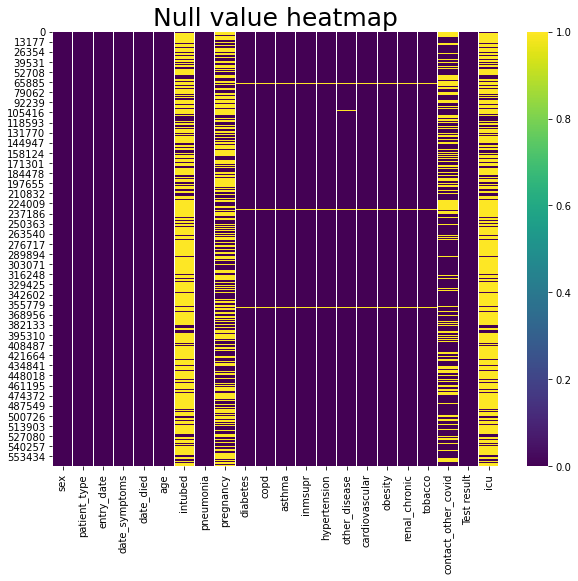

In [66]:
plt.figure(figsize=(10,8))
sns.heatmap(covid.isnull(),cmap='viridis')
plt.title('Null value heatmap',size=25)

In [81]:
def age_band(age):
    
   
    if age<2:
        return 'Less than 2'
    elif (age>1) and (age<11):
        return '2-10'
    elif (age>10 and age<21):
        return '10-20'
    elif (age>20 and age<31):
        return '20-30'
    elif (age>30 and age<41):
        return '30-40'
    elif (age>40 and age<51):
        return '40-50'
    elif (age>50 and age<61):
        return '50-60'
    elif (age>60 and age<81):
        return '60-80'
    else:
        return 'Above 80'

covid['Age band']=covid['age'].apply(age_band)
covid['Count']=1

In [67]:
covid.head()

,sex,patient_type,entry_date,date_symptoms,date_died,age,intubed,pneumonia,pregnancy,diabetes,...,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,Test result,icu
0,2,1,04-05-2020,02-05-2020,9999-99-99,27,NaN,No,NaN,No,...,No,No,No,No,No,No,No,No,Positive,NaN
1,2,1,19-03-2020,17-03-2020,9999-99-99,24,NaN,No,NaN,No,...,No,No,No,No,No,No,No,NaN,Positive,NaN
2,1,2,06-04-2020,01-04-2020,9999-99-99,54,No,No,No,No,...,No,No,No,No,Yes,No,No,NaN,Positive,No
3,2,2,17-04-2020,10-04-2020,9999-99-99,30,No,Yes,NaN,No,...,No,No,No,No,No,No,No,NaN,Positive,No
4,1,2,13-04-2020,13-04-2020,22-04-2020,60,No,No,No,Yes,...,No,Yes,No,Yes,No,No,No,NaN,Positive,No


In [68]:
covid['Fatal'] = covid['date_died'].map(lambda x: 'No' if x=='9999-99-99' else 'Yes' )

In [69]:
covid.Fatal.value_counts()

No     530426
Yes     36176
Name: Fatal, dtype: int64

In [70]:
df_pos=covid[covid['Test result']=='Positive']
df_pos.reset_index(drop=True,inplace=True)


In [71]:
df_pos.head()

,sex,patient_type,entry_date,date_symptoms,date_died,age,intubed,pneumonia,pregnancy,diabetes,...,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,Test result,icu,Fatal
0,2,1,04-05-2020,02-05-2020,9999-99-99,27,NaN,No,NaN,No,...,No,No,No,No,No,No,No,Positive,NaN,No
1,2,1,19-03-2020,17-03-2020,9999-99-99,24,NaN,No,NaN,No,...,No,No,No,No,No,No,NaN,Positive,NaN,No
2,1,2,06-04-2020,01-04-2020,9999-99-99,54,No,No,No,No,...,No,No,No,Yes,No,No,NaN,Positive,No,No
3,2,2,17-04-2020,10-04-2020,9999-99-99,30,No,Yes,NaN,No,...,No,No,No,No,No,No,NaN,Positive,No,No
4,1,2,13-04-2020,13-04-2020,22-04-2020,60,No,No,No,Yes,...,Yes,No,Yes,No,No,No,NaN,Positive,No,Yes


Text(0.5, 0, 'Fatality rate: 15.70 %')

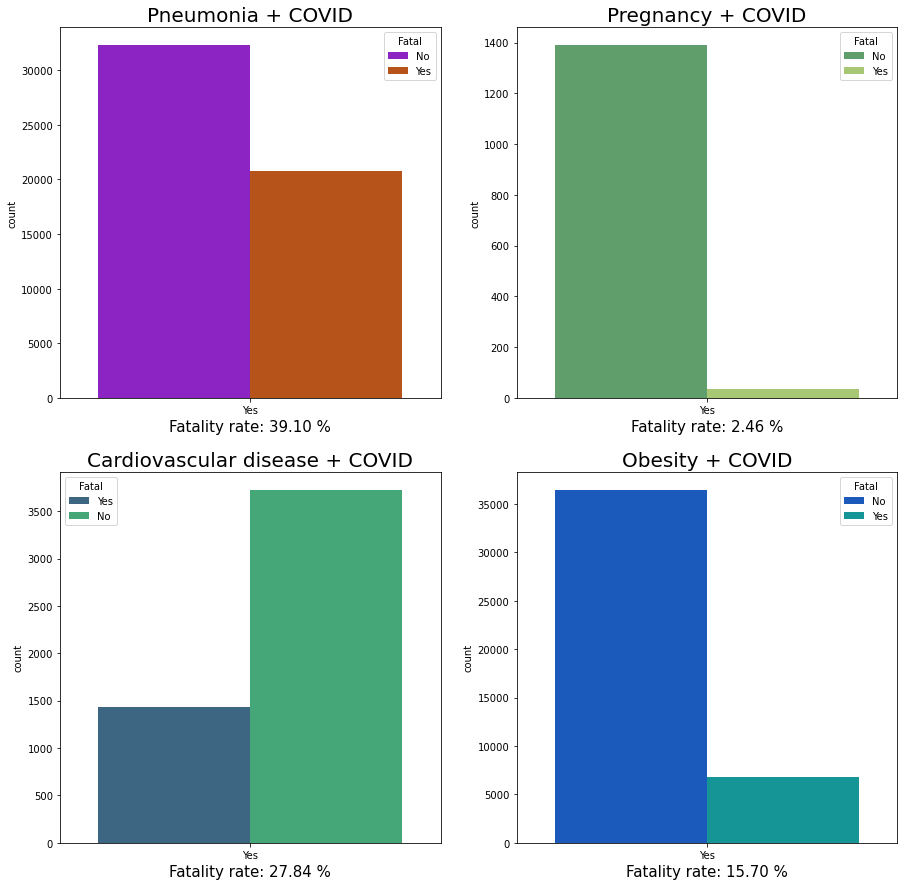

In [72]:
fig2=plt.figure(figsize=(15,15))
ax1=fig2.add_subplot(2,2,1)
ax2=fig2.add_subplot(2,2,2)
ax3=fig2.add_subplot(2,2,3)
ax4=fig2.add_subplot(2,2,4)
df_pneu=df_pos[df_pos['pneumonia']=='Yes']
df_preg=df_pos[df_pos['pregnancy']=='Yes']
df_card=df_pos[df_pos['cardiovascular']=='Yes']
df_obes=df_pos[df_pos['obesity']=='Yes']


sns.countplot('pneumonia',data=df_pneu,hue='Fatal',ax=ax1,palette='gnuplot')
sns.countplot('pregnancy',data=df_preg,hue='Fatal',ax=ax2,palette='summer')
sns.countplot('cardiovascular',data=df_card,hue='Fatal',ax=ax3,palette='viridis')
sns.countplot('obesity',data=df_obes,hue='Fatal',ax=ax4,palette='winter')

ax1.set_title('Pneumonia + COVID',size=20)
ax2.set_title('Pregnancy + COVID',size=20)
ax3.set_title('Cardiovascular disease + COVID',size=20)
ax4.set_title('Obesity + COVID',size=20)


ax1.set_xlabel('Fatality rate: {0:.2f} %'.format(100*df_pneu['Fatal'].value_counts()[1]/df_pneu['Fatal'].shape[0]),size=15)
ax2.set_xlabel('Fatality rate: {0:.2f} %'.format(100*df_preg['Fatal'].value_counts()[1]/df_preg['Fatal'].shape[0]),size=15)
ax3.set_xlabel('Fatality rate: {0:.2f} %'.format(100*df_card['Fatal'].value_counts()[1]/df_card['Fatal'].shape[0]),size=15)
ax4.set_xlabel('Fatality rate: {0:.2f} %'.format(100*df_obes['Fatal'].value_counts()[1]/df_obes['Fatal'].shape[0]),size=15)

* Obesity, cardiovasulart diseae and Pneumonia are far more lethal than any other pre-conditions.

## Back to the original Dataset

In [33]:
df.head()

,cdc_case_earliest_dt,cdc_report_dt,current_status,sex,age_group,hosp_yn,icu_yn,death_yn,medcond_yn,disease maturity,Race
2,2020/03/22,2020-03-22,Laboratory-confirmed case,Female,10.0,No,No,No,No,-1 days,Hispanic/Latino
3,2020/03/23,2020-03-23,Laboratory-confirmed case,Female,10.0,No,Missing,No,No,0 days,Hispanic/Latino
5,2020/03/23,2020-03-23,Laboratory-confirmed case,Female,10.0,No,Missing,No,No,0 days,Hispanic/Latino
8,2020/03/16,2020-03-31,Laboratory-confirmed case,Male,10.0,Yes,No,No,Yes,-7 days,Missing
16,2020/03/15,2020-03-15,Laboratory-confirmed case,Male,10.0,No,Missing,No,No,-8 days,Unknown


* Now we are ready for machine learnig modelling
* We will start with converting some categorical features into numeric

In [34]:
from sklearn.preprocessing import LabelEncoder

In [35]:
le = LabelEncoder()

* For 'sex' column we can simply use the map function

In [36]:
df['sex'] = df['sex'].map({'Female':0,'Male':1,'Unknown':2,'Missing':3,'Other':4})

In [37]:
df.age_group = df.age_group.astype(int)

In [38]:
df.shape

(1912019, 11)

In [39]:
df.replace('Unknown', np.nan, inplace=True)

In [40]:
df.dropna(inplace=True)

In [41]:
df.shape

(1118549, 11)

In [42]:
df.age_group.value_counts()

30    218556
40    186122
50    170771
60    160607
20    126551
70    114249
80     60177
10     44558
90     36958
Name: age_group, dtype: int64

In [44]:
age_map = {10:0, 20:1, 30:2, 40:3, 50:4, 60:5, 70:6, 80:7, 90:8}
df['age_group'] = df['age_group'].map(age_map)

In [45]:
df.tail(20)

,cdc_case_earliest_dt,cdc_report_dt,current_status,sex,age_group,hosp_yn,icu_yn,death_yn,medcond_yn,disease maturity,Race
13415805,2020/12/12,2020-12-23,Laboratory-confirmed case,1,4,Missing,Missing,Missing,Yes,-6 days,Black
13415806,2020/12/16,2020-12-29,Laboratory-confirmed case,1,4,No,Missing,No,No,-2 days,Black
13415807,2020/12/14,2020-12-21,Laboratory-confirmed case,1,4,Missing,Missing,No,Yes,-4 days,Black
13415809,2020/12/10,2020-12-29,Laboratory-confirmed case,1,4,Yes,No,No,Yes,-8 days,Black
13415812,2020/12/14,2020-12-19,Laboratory-confirmed case,2,4,No,Missing,Missing,No,-4 days,White
13415814,2020/12/14,2020-12-19,Laboratory-confirmed case,2,4,Missing,Missing,Missing,Yes,-4 days,Hispanic/Latino
13415817,2020/12/14,2020-12-14,Laboratory-confirmed case,1,4,No,No,Missing,Missing,-4 days,Asian
13415818,2020/12/04,2020-12-21,Laboratory-confirmed case,1,4,Missing,Missing,No,Yes,-14 days,Asian
13415819,2020/12/16,2020-12-22,Laboratory-confirmed case,1,4,Missing,Missing,No,No,-2 days,Asian
13415820,2020/12/12,2020-12-12,Laboratory-confirmed case,1,4,No,No,No,No,-6 days,Asian


In [46]:
backup = df.copy()

In [47]:
df["current_status"] = le.fit_transform(df["current_status"])
df["hosp_yn"] = le.fit_transform(df["hosp_yn"])
df["icu_yn"] = le.fit_transform(df["icu_yn"])
df["death_yn"] = le.fit_transform(df["death_yn"])
df["medcond_yn"] = le.fit_transform(df["medcond_yn"])


In [48]:
df.tail()

,cdc_case_earliest_dt,cdc_report_dt,current_status,sex,age_group,hosp_yn,icu_yn,death_yn,medcond_yn,disease maturity,Race
13415830,2020/12/16,2020-12-16,0,1,4,1,1,1,1,-2 days,Asian
13415831,2020/12/16,2020-12-20,0,1,4,0,0,0,2,-2 days,Asian
13415833,2020/12/14,2020-12-21,1,1,4,1,1,1,0,-4 days,Asian
13415834,2020/12/15,2020-12-20,0,1,4,0,0,0,2,-3 days,Asian
13415835,2020/12/16,2020-12-16,0,1,4,1,0,0,0,-2 days,Asian


In [49]:
df.death_yn.value_counts()

1    774350
0    322360
2     21839
Name: death_yn, dtype: int64

In [50]:
X = df[['current_status','hosp_yn','icu_yn','medcond_yn','sex']]
y = df['death_yn']

In [51]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [53]:
lr = LogisticRegression()

In [54]:
lr.fit(X_train, y_train)

LogisticRegression()

In [55]:
y_pred = lr.predict(X_test)

In [56]:
accuracy_score(y_test,y_pred)

0.7876962088415213

In [57]:
confusion_matrix(y_test,y_pred)

array([[ 59752,  46543,      0],
       [ 24490, 231004,      0],
       [   931,   6402,      0]], dtype=int64)

In [72]:
print(classification_report(y_test,y_pred))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.83      0.78      0.81   1045444
           1       0.76      0.84      0.80    997715
           2       0.00      0.00      0.00     43091

    accuracy                           0.79   2086250
   macro avg       0.53      0.54      0.54   2086250
weighted avg       0.78      0.79      0.79   2086250



In [91]:
from sklearn.svm import SVC

In [93]:
svc = SVC()

In [ ]:
svc.fit(X_train, y_train)

In [ ]:
y_pred_svc = svc.predict(X_test)

* Let's try to impute with KNN

In [65]:
backup.head()

,cdc_case_earliest_dt,cdc_report_dt,current_status,sex,age_group,hosp_yn,icu_yn,death_yn,medcond_yn,disease maturity,Race
2,2020/03/22,2020-03-22,0,0,0,1,1,No,1,-1 days,3
3,2020/03/23,2020-03-23,0,0,0,1,0,No,1,0 days,3
5,2020/03/23,2020-03-23,0,0,0,1,0,No,1,0 days,3
8,2020/03/16,2020-03-31,0,1,0,2,1,No,2,-7 days,4
34,2020/03/17,2020-04-05,0,1,0,2,1,No,1,0 days,3


* Label encode sex column
* factor in Race
* Impute missing values with KNN

In [59]:
from sklearn.impute import KNNImputer

In [60]:
le = LabelEncoder()

In [61]:
backup["current_status"] = le.fit_transform(backup["current_status"])
backup["hosp_yn"] = le.fit_transform(backup["hosp_yn"])
backup["icu_yn"] = le.fit_transform(backup["icu_yn"])
# df["death_yn"] = le.fit_transform(df["death_yn"])
backup["medcond_yn"] = le.fit_transform(backup["medcond_yn"])


In [62]:
backup["Race"] = le.fit_transform(backup["Race"])

In [63]:
backup["sex"] = le.fit_transform(backup["sex"])

In [67]:
backup.head()

,cdc_case_earliest_dt,cdc_report_dt,current_status,sex,age_group,hosp_yn,icu_yn,death_yn,medcond_yn,disease maturity,Race
2,2020/03/22,2020-03-22,0,0,0,1,1,No,1,-1 days,3
3,2020/03/23,2020-03-23,0,0,0,1,0,No,1,0 days,3
5,2020/03/23,2020-03-23,0,0,0,1,0,No,1,0 days,3
8,2020/03/16,2020-03-31,0,1,0,2,1,No,2,-7 days,4
34,2020/03/17,2020-04-05,0,1,0,2,1,No,1,0 days,3


In [66]:
new = backup.head(50)

In [93]:
backup.Race.value_counts()

White                                     3236571
Hispanic/Latino                           1170715
Black                                      727956
Missing                                    581656
Multiple/Other                             343782
Asian                                      159268
American Indian/Alaska Native               83138
Native Hawaiian/Other Pacific Islander      18883
Name: Race, dtype: int64

In [91]:
backup['Race'] = backup['race_ethnicity_combined'].str.split(',').str[0]
backup = backup.drop('race_ethnicity_combined', axis=1)

In [75]:
backup.sex.value_counts()

Female     3338491
Male       2959841
Missing      23539
Other           98
Name: sex, dtype: int64

In [89]:
backup.death_yn.isnull().sum()

3165944

* It's not a good idea to impute all the missing values in the dataframe , reason being Missing data is more than the categorical data for each class

* Therefore we will just impute the missing values of the target feature (death_yn)

In [68]:
backup['death_yn'] = backup['death_yn'].replace('Missing', np.nan)

In [69]:
backup['death_yn'] = backup['death_yn'].map({'No': int(0),'Yes':int(1)})

In [70]:
backup.death_yn.value_counts()

0.0    774350
1.0     21839
Name: death_yn, dtype: int64

In [71]:
X_imp = backup[['current_status','hosp_yn','icu_yn','medcond_yn','sex','Race','death_yn']]
# y = df['death_yn']

In [72]:
from sklearn.preprocessing import MinMaxScaler

In [73]:
scaler = MinMaxScaler()

In [74]:
final = pd.DataFrame(scaler.fit_transform(X_imp), columns = X_imp.columns)

In [75]:
final.head()

,current_status,hosp_yn,icu_yn,medcond_yn,sex,Race,death_yn
0,0.0,0.5,0.5,0.5,0.00,0.428571,0.0
1,0.0,0.5,0.0,0.5,0.00,0.428571,0.0
2,0.0,0.5,0.0,0.5,0.00,0.428571,0.0
3,0.0,1.0,0.5,1.0,0.25,0.571429,0.0
4,0.0,1.0,0.5,0.5,0.25,0.428571,0.0


In [101]:
new = final.head(100000)

In [102]:
new.tail()

,current_status,hosp_yn,icu_yn,medcond_yn,sex,Race,death_yn
99995,1.0,0.5,0.5,0.5,0.25,1.0,0.0
99996,0.0,1.0,1.0,1.0,0.25,1.0,1.0
99997,0.0,0.5,0.5,1.0,0.25,1.0,0.0
99998,0.0,0.5,0.0,0.0,0.25,1.0,NaN
99999,0.0,0.5,0.0,1.0,0.25,1.0,NaN


In [110]:
new.shape

(100000, 7)

In [111]:
final.shape

(1118549, 7)

In [112]:
print(final.death_yn.value_counts())
print('---------------------------')
print(final.isnull().sum())

0.0    774350
1.0     21839
Name: death_yn, dtype: int64
---------------------------
current_status         0
hosp_yn                0
icu_yn                 0
medcond_yn             0
sex                    0
Race                   0
death_yn          322360
dtype: int64


In [113]:
imputer = KNNImputer(n_neighbors=2)

In [114]:
imputer.fit(final)

KNNImputer(n_neighbors=2)

In [115]:
final.tail()

,current_status,hosp_yn,icu_yn,medcond_yn,sex,Race,death_yn
1118544,0.0,0.5,0.5,0.5,0.25,0.142857,0.0
1118545,0.0,0.0,0.0,1.0,0.25,0.142857,NaN
1118546,1.0,0.5,0.5,0.0,0.25,0.142857,0.0
1118547,0.0,0.0,0.0,1.0,0.25,0.142857,NaN
1118548,0.0,0.5,0.0,0.0,0.25,0.142857,NaN


### This step will take a lot of time 

In [116]:
final = pd.DataFrame(imputer.fit_transform(final), columns = final.columns)

In [123]:
final.tail()

,current_status,hosp_yn,icu_yn,medcond_yn,sex,Race,death_yn
1118544,0.0,0.5,0.5,0.5,0.25,0.142857,0.0
1118545,0.0,0.0,0.0,1.0,0.25,0.142857,0.0
1118546,1.0,0.5,0.5,0.0,0.25,0.142857,0.0
1118547,0.0,0.0,0.0,1.0,0.25,0.142857,0.0
1118548,0.0,0.5,0.0,0.0,0.25,0.142857,0.0


In [121]:
final.death_yn.value_counts()

0.0    1094228
1.0      22330
0.5       1991
Name: death_yn, dtype: int64

In [125]:
final.shape

(1118549, 7)

In [160]:
X = final[['current_status','hosp_yn','icu_yn','medcond_yn','sex']]
y = final['death_yn']

In [161]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [128]:
lr1 = LogisticRegression()

In [155]:
result = lr1.fit(X_train,y_train)

In [156]:
result.summary()

AttributeError: 'LogisticRegression' object has no attribute 'summary'

In [131]:
y_pred1 = lr1.predict(X_test)

In [132]:
accuracy_score(y_test, y_pred1)

0.7876962088415213

In [133]:
print(classification_report(y_test,y_pred1))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.70      0.56      0.62    106295
           1       0.81      0.90      0.86    255494
           2       0.00      0.00      0.00      7333

    accuracy                           0.79    369122
   macro avg       0.51      0.49      0.49    369122
weighted avg       0.77      0.79      0.77    369122



In [134]:
confusion_matrix(y_test, y_pred1)

array([[ 59752,  46543,      0],
       [ 24490, 231004,      0],
       [   931,   6402,      0]], dtype=int64)

In [147]:
import tensorflow as tf

from tensorflow import keras

from keras.models import Sequential

from keras.layers import Dense

In [148]:
model = Sequential()

model.add(Dense(6,activation='relu'))
model.add(Dense(3,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [150]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [151]:
model.fit(X_train, y_train, epochs=5, batch_size=10)

Epoch 1/5
74943/74943 [==============================] - 108s 1ms/step - loss: -0.5556 - accuracy: 0.8065
Epoch 2/5
74943/74943 [==============================] - 108s 1ms/step - loss: -20.3882 - accuracy: 0.7932
Epoch 3/5
74943/74943 [==============================] - 108s 1ms/step - loss: -118.5176 - accuracy: 0.7961
Epoch 4/5
74943/74943 [==============================] - 107s 1ms/step - loss: -371.6764 - accuracy: 0.7877
Epoch 5/5
74943/74943 [==============================] - 107s 1ms/step - loss: -854.9777 - accuracy: 0.7876


In [162]:
model2 = Sequential()

model2.add(Dense(6,activation='relu'))
model2.add(Dense(3,activation='relu'))
model2.add(Dense(2,activation='relu'))
model2.add(Dense(1,activation='sigmoid'))
model2.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

In [164]:
model2.fit(X_train, y_train, epochs=5, batch_size=10)


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



Epoch 1/5
74943/74943 [==============================] - 102s 1ms/step - loss: 0.0229 - accuracy: 0.9784
Epoch 2/5
74943/74943 [==============================] - 102s 1ms/step - loss: 0.0198 - accuracy: 0.9784
Epoch 3/5
74943/74943 [==============================] - 102s 1ms/step - loss: 0.0198 - accuracy: 0.9784
Epoch 4/5
74943/74943 [==============================] - 103s 1ms/step - loss: 0.0198 - accuracy: 0.9784
Epoch 5/5
74943/74943 [==============================] - 102s 1ms/step - loss: 0.0198 - accuracy: 0.9784


### Great Accuracy!

In [154]:
#I would like to the null hypothesis testing of effect of the virus on number of deaths per month. So the null hypothesis in this would be that there is no effect of virus and we want to check the alternate hypothesis that is spread of virus increased the number of deaths.

In [165]:
model2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 6)                 36        
_________________________________________________________________
dense_12 (Dense)             (None, 3)                 21        
_________________________________________________________________
dense_13 (Dense)             (None, 2)                 8         
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 3         
Total params: 68
Trainable params: 68
Non-trainable params: 0
_________________________________________________________________


## ICU Prediction

In [158]:
final.icu_yn.value_counts()

0.0    578367
0.5    518486
1.0     21696
Name: icu_yn, dtype: int64

In [166]:
X_ic = final[['current_status','hosp_yn','medcond_yn','sex']]
y_ic = final['icu_yn']

In [167]:
X_train, X_test, y_train, y_test = train_test_split(X_ic, y_ic, test_size=0.33, random_state=42)

In [173]:
model_ic = Sequential()
model_ic.add(Dense(4,activation='relu'))
model_ic.add(Dense(6,activation='relu'))
model_ic.add(Dense(3,activation='relu'))
model_ic.add(Dense(2,activation='relu'))
model_ic.add(Dense(1,activation='sigmoid'))
model_ic.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

In [174]:
model_ic.fit(X_train, y_train, epochs=5, batch_size=10)


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



Epoch 1/5
74943/74943 [==============================] - 106s 1ms/step - loss: 0.0512 - accuracy: 0.5256
Epoch 2/5
74943/74943 [==============================] - 106s 1ms/step - loss: 0.0503 - accuracy: 0.5273
Epoch 3/5
74943/74943 [==============================] - 106s 1ms/step - loss: 0.0503 - accuracy: 0.5274
Epoch 4/5
74943/74943 [==============================] - 107s 1ms/step - loss: 0.0503 - accuracy: 0.5274
Epoch 5/5
74943/74943 [==============================] - 107s 1ms/step - loss: 0.0503 - accuracy: 0.5275
